#### Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.
Ans:\
Missing values in a dataset refer to the absence of data in one or more fields or attributes. They can occur due to various reasons, such as incomplete data collection, data entry errors, or data corruption.

It is essential to handle missing values in a dataset because they can negatively impact the quality and accuracy of data analysis and machine learning models. Missing values can cause bias in statistical analysis and prediction models, leading to incorrect conclusions and inaccurate predictions. Additionally, most machine learning algorithms cannot handle missing values, and they may either fail to produce results or produce suboptimal results.

Some algorithms that are not affected by missing values include decision trees, random forests, and gradient boosting algorithms such as XGBoost and LightGBM. These algorithms are capable of handling missing values by using a variety of techniques such as surrogate splits, imputation, or treating missing values as a separate category. However, it is always recommended to handle missing values appropriately to avoid introducing errors and biases in data analysis and modeling.
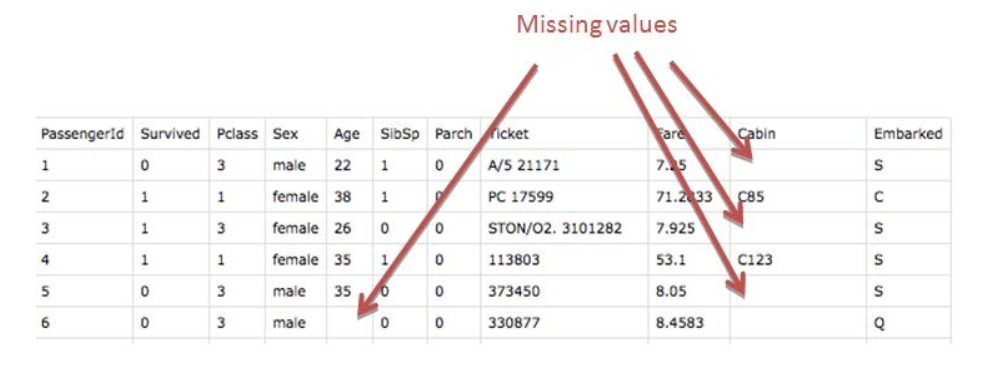

#### Q2. List down techniques used to handle missing data. Give an example of each with python code.

##### Here are some common techniques used to handle missing data in a dataset, along with examples in Python code:

In [ ]:
# lets take a dataset for handling missimg values
import seaborn as sns
import pandas as pd
df=sns.load_dataset("titanic")
df.head()

1. Deletion:
This involves removing the rows or columns that contain missing values from the dataset. This technique is appropriate when the missing values are random and the amount of data loss is acceptable.

In [ ]:
# deleting the missing values by row wise 
df_drop_nan_row = df.dropna()


In [ ]:
print("Before deleting the missing values:", df.shape)
print("After deleting the missing values:", df_drop_nan_row.shape)

In [ ]:
## Column wise deletion
print("Before deleting the missing values:", df.shape)
print("After deleting the missing values:", df.dropna(axis=1).shape)


2. Simple Imputation:
This involves filling in the missing values with an estimated value based on the available data. This technique is appropriate when the missing values are non-random and the amount of missing data is relatively small.
* Mean Imputation : This should be used on numerical variables when there are no outliers. Mean Imputation Works Well when we have normally distributed data


In [64]:
df['Age_mean']=df['age'].fillna(df['age'].mean())
df[['Age_mean','age']].tail()

,Age_mean,age
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0
890,32.000000,32.0


* Median Imputation : This should be used on numerical variables when there are outliers present in data

In [65]:
df['Age_median']=df['age'].fillna(df['age'].median())
df[['Age_median','age']].tail()

,Age_median,age
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0
890,32.0,32.0


* Mode Imputation : This should be used to handle categorical misssing data only

In [100]:
df.iloc[[61,829]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,embarked_mode
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,S
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,S


In [101]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]
df['embarked_mode']=df['embarked'].fillna(mode_value)
df[['embarked_mode','embarked']].iloc[[61,829]]

,embarked_mode,embarked
61,S,NaN
829,S,NaN


#### Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?
Ans:\
Imbalanced data refers to a situation where the classes or categories in a dataset are not equally represented. This means that one or more classes have significantly fewer samples than the others. Imbalanced data is common in many real-world applications such as fraud detection, medical diagnosis, and rare event prediction.

The problem with imbalanced data is that most machine learning algorithms are designed to assume that the classes are balanced, and they tend to perform poorly when applied to imbalanced data. This is because the algorithms tend to be biased towards the majority class, which can lead to poor performance on the minority class. For example, if a dataset contains 95% samples of Class A and only 5% samples of Class B, a classifier trained on this dataset is likely to predict most new examples as Class A, regardless of their actual class.
If imbalanced data is not handled, it can lead to several problems, including:
* Poor performance: The performance of a classifier trained on imbalanced data is likely to be poor, particularly on the minority class. This can lead to false negatives and false positives, which can have serious consequences in some applications.

* Biased models: Imbalanced data can lead to biased models that are not representative of the true distribution of the data. This can result in poor generalization to new examples and can make the model less reliable.

* Overfitting: In imbalanced datasets, the model can learn to overfit on the majority class, which can lead to poor performance on the minority class.

#### Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-sampling are required.
Ans:
Upsampling and downsampling are two common techniques used to handle imbalanced data in machine learning.

Downsampling involves reducing the number of samples in the majority class to match the number of samples in the minority class. This can be done randomly or using more sophisticated techniques, such as clustering or instance selection. Downsampling is useful when the majority class has a large number of samples that can be safely removed without losing important information.

For example, consider a dataset with 1000 samples of Class A and 100 samples of Class B. If we downsample Class A to 100 samples, we can create a balanced dataset with 100 samples of each class.

Upsampling, on the other hand, involves increasing the number of samples in the minority class to match the number of samples in the majority class. This can be done by replicating existing samples in the minority class, or by generating new synthetic samples using techniques such as SMOTE (Synthetic Minority Over-sampling Technique). Upsampling is useful when the minority class has a small number of samples that cannot be safely removed, and when we want to avoid losing important information.

For example, consider a dataset with 1000 samples of Class A and 100 samples of Class B. If we upsample Class B to 1000 samples using SMOTE, we can create a balanced dataset with 1000 samples of each class.

Whether to use upsampling or downsampling depends on the specific dataset and problem at hand. In general, upsampling is preferred when the minority class is important and has important features that need to be preserved, while downsampling is preferred when the majority class is too large to process efficiently or contains a significant amount of irrelevant data.

In summary, upsampling and downsampling are two techniques used to handle imbalanced data in machine learning. Upsampling involves increasing the number of samples in the minority class, while downsampling involves reducing the number of samples in the majority class. The choice of which technique to use depends on the specific dataset and problem at hand.

#### Q5: What is data Augmentation? Explain SMOTE.
Ans:
Data augmentation is a technique used to increase the size and diversity of a dataset by creating new synthetic examples based on the existing data. This technique is commonly used in machine learning to improve model performance, particularly in situations where the available dataset is small or imbalanced.

One popular data augmentation technique is SMOTE (Synthetic Minority Over-sampling Technique). SMOTE is specifically designed to handle imbalanced datasets where the minority class has very few samples. SMOTE generates synthetic examples of the minority class by interpolating between pairs of minority class examples.

The basic idea of SMOTE is to randomly select a minority class example and its k nearest neighbors, where k is a user-defined parameter. SMOTE then creates new synthetic examples by interpolating between the minority example and each of its k nearest neighbors. Specifically, SMOTE selects a random point along the line segment connecting the minority example and its nearest neighbor and adds this point as a new example to the dataset.

This process is repeated until the desired number of synthetic examples has been generated. The result is a larger and more diverse dataset that includes synthetic examples of the minority class.
SMOTE can be very effective in improving the performance of machine learning models on imbalanced datasets. By creating synthetic examples of the minority class, SMOTE can help to address the problem of class imbalance and ensure that the model is better able to generalize to new examples.

However, it is important to note that SMOTE can also introduce some noise and overfitting in the data, particularly if the value of k is set too high. Therefore, it is important to carefully select the parameters of SMOTE and to evaluate its effectiveness using appropriate validation techniques.
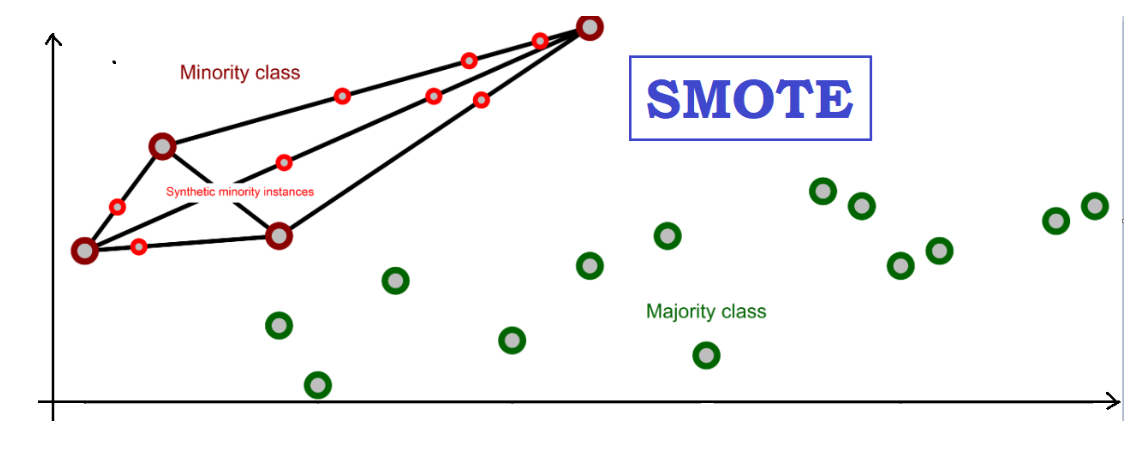

#### Q6: What are outliers in a dataset? Why is it essential to handle outliers?
Ans:\
Outliers are data points that are significantly different from other data points in a dataset. These data points can be either very high or very low in value, and they can have a significant impact on statistical analysis and machine learning models.

**It is essential to handle outliers because they can cause a number of problems, including:**
* Skewed data distribution: Outliers can distort the data distribution, making it difficult to accurately interpret the data and identify patterns.
* Misleading statistical measures: Outliers can significantly affect statistical measures such as mean and standard deviation, leading to inaccurate or misleading results.
* Biased machine learning models: Outliers can have a disproportionate influence on the model training process, leading to biased models that perform poorly on new data.
* Reduced model performance: Outliers can cause overfitting, leading to reduced model performance and accuracy.

#### Q7 : You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?
Ans:\
There are several techniques that can be used to handle missing data in customer data analysis:
Deletion: One simple approach is to simply delete any rows or columns with missing data. However, this approach can lead to loss of important information and reduce the size of the dataset.

Imputation: Imputation involves replacing missing data with estimated values based on the available data. This can be done using techniques such as mean imputation, median imputation, mode imputation, and iterative imputation.

Regression: Regression analysis can be used to predict missing values based on the available data. This approach can be particularly effective if there is a strong correlation between the missing variable and other variables in the dataset.

Multiple imputation: Multiple imputation involves creating multiple imputed datasets and combining them to produce a final estimate of the missing values. This approach can be particularly effective if there is a significant amount of missing data in the dataset.

Machine learning: Machine learning algorithms can be used to predict missing values based on the available data. This approach can be particularly effective if the dataset contains complex relationships between variables.

The choice of technique will depend on the nature of the missing data, the size of the dataset, and the specific requirements of the analysis. It is important to carefully evaluate the effectiveness of each technique and to consider the potential impact of missing data on the analysis results.

#### Q8 : You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?
Ans: \
When dealing with missing data, there are several strategies to determine if the missing data is missing at random or if there is a pattern to the missing data. Here are some of the most commonly used methods:
* Analyze missingness patterns: You can start by examining the missingness patterns in the data. Plotting the distribution of missing values by variable or by record can help identify patterns of missingness. If the missingness patterns are random or similar across all variables, then it is likely that the missing data is missing at random. However, if there are patterns in the missingness, such as specific variables having higher rates of missing values or specific values within a variable being more likely to be missing, this suggests that the missing data may be non-random.

* Correlation analysis: You can examine the correlation between the missingness of a variable and other variables in the dataset. If the missingness of a variable is not correlated with any other variable, then it is likely missing at random. However, if the missingness of a variable is correlated with other variables, it suggests that the missing data may be non-random.

* Imputation and analysis: Impute the missing values using various techniques and compare the results. If the results are consistent across multiple imputation techniques, then it suggests that the missing data is missing at random. However, if the results vary significantly depending on the imputation technique used, it suggests that the missing data may be non-random.

* Expert knowledge: Sometimes expert knowledge can help determine if the missing data is missing at random or not. For example, if you are studying the impact of a new medication, and patients who experience side effects are more likely to drop out of the study, then the missing data is likely not missing at random.

* Statistical tests: You can use statistical tests such as the Little’s MCAR test or Missing Completely at Random (MCAR) test to determine if the missing data is missing at random or not. These tests can help determine if the pattern of missing data can be explained by chance or if there is a systematic reason for the missing data.

Overall, it's important to remember that determining the pattern of missing data is often a combination of these methods, and it may require some judgment to make a final determination.

#### Q9 : Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?
Ans:
Dealing with imbalanced datasets is a common problem in machine learning, especially in medical diagnosis projects. Here are some strategies you can use to evaluate the performance of your machine learning model on an imbalanced dataset:
* Confusion matrix: A confusion matrix is a table that summarizes the performance of a classification model. It shows the true positive, false positive, true negative, and false negative rates. In the case of an imbalanced dataset, accuracy may not be a good metric to evaluate the model's performance. Instead, you can look at other metrics such as precision, recall, F1-score, and the area under the receiver operating characteristic (ROC) curve. These metrics are not affected by the class imbalance and provide a better evaluation of the model's performance.

* Resampling techniques: Resampling techniques can be used to balance the dataset. You can either oversample the minority class or undersample the majority class. Oversampling involves adding copies of the minority class to the dataset, while undersampling involves removing examples from the majority class. However, both techniques have some drawbacks. Oversampling can lead to overfitting, while undersampling can lead to a loss of information. One common resampling technique is SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic examples of the minority class.

* Ensemble methods: Ensemble methods combine multiple models to improve their performance. One common ensemble method is the bagging method, which involves training multiple models on different subsets of the dataset and averaging their predictions. Another common ensemble method is the boosting method, which involves training multiple models sequentially, with each subsequent model focusing on the errors of the previous model. Ensemble methods can help improve the performance of the model on imbalanced datasets.

* Cost-sensitive learning: Cost-sensitive learning involves assigning different costs to different types of errors. In the case of an imbalanced dataset, misclassifying a minority class example as a majority class example may be more costly than the opposite. By assigning different costs to different types of errors, the model can be trained to minimize the overall cost of errors rather than just the number of errors.

* Domain knowledge: Finally, domain knowledge can be used to improve the model's performance on an imbalanced dataset. For example, if the dataset contains demographic information, you can use this information to stratify the dataset and ensure that both classes are represented equally in each stratum.

Overall, it's important to remember that there is no single best strategy for dealing with imbalanced datasets, and the best approach may depend on the specific dataset and problem at hand. It's often a combination of these techniques that leads to the best results.

#### Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is
unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to
balance the dataset and down-sample the majority class?
Ans:
There are several methods that can be employed to balance an unbalanced dataset and down-sample the majority class. Here are a few possible approaches:
* Random under-sampling: This involves randomly removing instances from the majority class until the dataset is balanced. One potential drawback of this approach is that it may result in the loss of important information, particularly if the majority class contains important or rare examples that should be preserved.

* Cluster-based under-sampling: This method involves clustering the majority class instances and then selecting representative instances from each cluster. This can help to preserve important information in the majority class, while also reducing the imbalance.

* Tomek Links: This method is an under-sampling technique that identifies pairs of instances from different classes that are close to each other, and removes the majority class instance from each pair. By doing this, the Tomek Links method creates a clearer separation between the two classes.

* Edited Nearest Neighbors (ENN): This method is also an under-sampling technique that removes noisy or mislabeled instances by checking the class of each instance's nearest neighbors. If an instance's nearest neighbors are mostly from a different class, then the instance is removed. ENN can be applied after other under-sampling or over-sampling techniques to further improve the balance of the dataset.

* Ensemble-based methods: These methods involve training multiple models on different subsets of the data, and then combining the results to produce a final prediction. This can be particularly useful in cases where the dataset is highly imbalanced and standard methods may not be effective.

It is important to note that there is no one "best" method for balancing an unbalanced dataset, and the choice of method will depend on the specific characteristics of the dataset and the goals of the analysis. It is also important to evaluate the performance of the chosen method on a validation set to ensure that it does not introduce biases or negatively impact the accuracy of the model.

#### Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?
Ans:
If I have an unbalanced dataset with a low percentage of occurrences of a rare event, you can employ various techniques to balance the dataset and up-sample the minority class. Here are a few possible approaches:
* Random over-sampling: This involves randomly duplicating instances from the minority class until the dataset is balanced. One potential drawback of this approach is that it may result in overfitting and lower the overall accuracy of the model.

* Synthetic minority over-sampling technique (SMOTE): This method involves creating synthetic instances of the minority class by interpolating between existing instances. SMOTE generates new instances by taking the difference between the feature vector of one minority class instance and its k-nearest neighbors, and then multiplying this difference by a random number between 0 and 1. This can help to balance the dataset while also preserving the overall distribution of the minority class.

* Adaptive Synthetic Sampling (ADASYN): This method is an extension of SMOTE that generates more synthetic instances in the minority class regions that are harder to learn by the classifier. The idea is to generate more synthetic samples where the density of the minority class is lower, thus focusing more on the difficult to learn samples.

* SMOTE-Tomek: This method combines the SMOTE over-sampling technique with Tomek Links under-sampling. Tomek Links are pairs of instances from different classes that are close to each other and can be removed to increase the separation between the classes. SMOTE-Tomek first applies applies SMOTE over-sampling to the remaining minority class instances., and then Tomek Links under-sampling to remove the majority class instances that form Tomek Links with minority class instances.

* SMOTE-ENN: This method combines the SMOTE over-sampling technique with Edited Nearest Neighbors (ENN) under-sampling. ENN is a cleaning technique that removes noisy or mislabeled instances by checking the class of each instance's nearest neighbors. SMOTE-ENN first applies SMOTE over-sampling to the minority class instances, and then applies ENN under-sampling to remove instances that are misclassified by their nearest neighbors.

It is important to note that up-sampling the minority class can also lead to overfitting and reduced generalization performance. Therefore, it is important to evaluate the performance of the chosen method on a validation set to ensure that it does not introduce biases or negatively impact the accuracy of the model.